<a href="https://colab.research.google.com/github/amd257/COVID-detection-using-CNNs/blob/main/SeqModel2_ThreeLabel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Compressed Dataset file is stored at: https://www.dropbox.com/s/7avu1oypedrerxl/Dataset.zip?dl=0

!wget https://www.dropbox.com/s/7avu1oypedrerxl/Dataset.zip?dl=0

--2021-02-25 13:14:03--  https://www.dropbox.com/s/7avu1oypedrerxl/Dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7avu1oypedrerxl/Dataset.zip [following]
--2021-02-25 13:14:03--  https://www.dropbox.com/s/raw/7avu1oypedrerxl/Dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca80844fa1f2016c8a78087bfc0.dl.dropboxusercontent.com/cd/0/inline/BJlXKEU_l6VBvuHBvZs7Bsr3OqKp3feerJ-MnmDkVlmyjGDb8OMsoMngI2zqNBFfbSXU8kdLcBumGGDcc5z0oncT26-3dOUiBiVsSDtIbCtSe3G8d4KeI2BC-GrrHh1YVlU/file# [following]
--2021-02-25 13:14:03--  https://uca80844fa1f2016c8a78087bfc0.dl.dropboxusercontent.com/cd/0/inline/BJlXKEU_l6VBvuHBvZs7Bsr3OqKp3feerJ-MnmDkVlmyjGDb8OMsoMngI2zqNBFfbSXU8kdLcBumGGDcc5z0oncT26-3dOUiBiVsSDtIbCtSe

In [2]:
!unzip /content/Dataset.zip?dl=0  #Extracting the compressed dataset

Archive:  /content/Dataset.zip?dl=0
   creating: Dataset/
   creating: Dataset/Test/
   creating: Dataset/Test/COVID/
  inflating: Dataset/Test/COVID/COVID (1001).png  
  inflating: Dataset/Test/COVID/COVID (1005).png  
  inflating: Dataset/Test/COVID/COVID (1012).png  
  inflating: Dataset/Test/COVID/COVID (1015).png  
  inflating: Dataset/Test/COVID/COVID (1019).png  
  inflating: Dataset/Test/COVID/COVID (1025).png  
  inflating: Dataset/Test/COVID/COVID (1027).png  
  inflating: Dataset/Test/COVID/COVID (1042).png  
  inflating: Dataset/Test/COVID/COVID (1043).png  
  inflating: Dataset/Test/COVID/COVID (1044).png  
  inflating: Dataset/Test/COVID/COVID (107).png  
  inflating: Dataset/Test/COVID/COVID (1073).png  
  inflating: Dataset/Test/COVID/COVID (1095).png  
  inflating: Dataset/Test/COVID/COVID (1099).png  
  inflating: Dataset/Test/COVID/COVID (113).png  
  inflating: Dataset/Test/COVID/COVID (1132).png  
  inflating: Dataset/Test/COVID/COVID (1143).png  
  inflating: Data

In [11]:
from tensorflow import keras
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.utils import plot_model
from keras.preprocessing import image
from keras.layers import *
from keras.models import *
import matplotlib.pyplot as plt
import numpy as np

In [5]:
train_images_path = "Dataset/Train"
validation_images_path = "Dataset/Validation"
test_images_path = "Dataset/Test"

In [6]:
#Training data augmentation before feeding it to the CNN model
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,  #flipping will add more variations to the data and it will help fight overfitting as welll
    )

#Preprocessing the training data
train_generator= train_datagen.flow_from_directory(
    train_images_path,
    target_size = (256,256), # this or (100,100) is also a good option
    batch_size = 32,
    color_mode="grayscale",
    class_mode = "categorical",
    shuffle = True,
    seed =40
    )

train_generator.class_indices
inp_shape= train_generator.image_shape
print(inp_shape)

Found 3108 images belonging to 3 classes.
(256, 256, 1)


In [8]:
validation_dataset = image.ImageDataGenerator(rescale = 1./255) #Rescaling the validation images 

#Preprocessing the validation dataset
validation_generator = validation_dataset.flow_from_directory(
    validation_images_path,
    target_size = (256,256),
    batch_size = 32,
    color_mode = "grayscale" ,
    class_mode = "categorical",
    shuffle = True,
    seed =40
    )

validation_generator.class_indices

Found 388 images belonging to 3 classes.


{'COVID': 0, 'Normal': 1, 'ViralPneumonia': 2}

In [9]:
# Sequential Model with 6 convolutional layers

seqmodel2 = Sequential()

seqmodel2.add(Conv2D(32, 
                     (3, 3), 
                     activation="relu", 
                     input_shape= inp_shape))
seqmodel2.add(MaxPooling2D(pool_size = (2, 2)))

seqmodel2.add(Conv2D(32, 
                     (3, 3), 
                     activation="relu", 
                     input_shape= inp_shape))
seqmodel2.add(MaxPooling2D(pool_size = (2, 2)))
seqmodel2.add(Dropout(0.25))

seqmodel2.add(Conv2D(32, 
                     (3, 3), 
                     activation="relu", 
                     input_shape= inp_shape))
seqmodel2.add(MaxPooling2D(pool_size = (2, 2)))
seqmodel2.add(Dropout(0.25))

seqmodel2.add(Conv2D(64, 
                     (3, 3), 
                     activation="relu", 
                     input_shape=inp_shape))
seqmodel2.add(MaxPooling2D(pool_size = (2, 2)))
seqmodel2.add(Dropout(0.25))

seqmodel2.add(Conv2D(64, 
                     (3, 3), 
                     activation="relu", 
                     input_shape=inp_shape))
seqmodel2.add(MaxPooling2D(pool_size = (2, 2)))
seqmodel2.add(Dropout(0.25))


seqmodel2.add(Conv2D(64, 
                     (3, 3), 
                     activation="relu", 
                     input_shape=inp_shape))
seqmodel2.add(MaxPooling2D(pool_size = (2, 2)))
seqmodel2.add(Dropout(0.25))

seqmodel2.add(Flatten())

seqmodel2.add(Dense(128, activation = 'relu'))

seqmodel2.add(Dense(64, activation = 'relu'))

seqmodel2.add(Dense(3, activation = 'sigmoid')) # changed output shape of sigmoid function to output the three labels


seqmodel2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
seqmodel2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0

(None, 256, 256, 1)


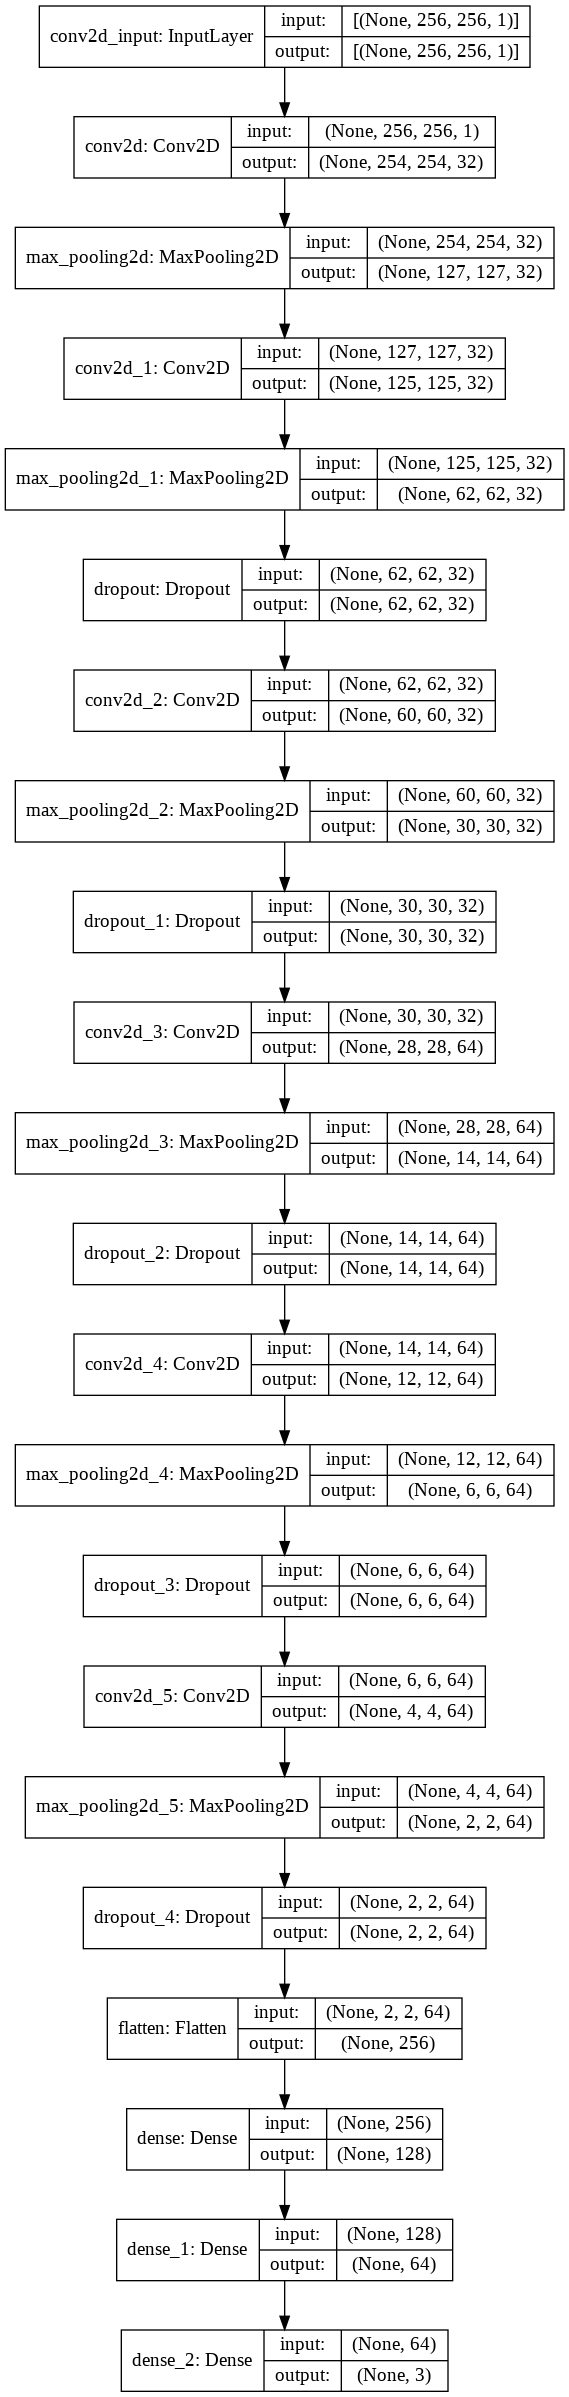

In [12]:
print(seqmodel2.input.shape)
plot_model(seqmodel2,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

In [13]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size
print(STEP_SIZE_TRAIN)
print(STEP_SIZE_VALID)

97
12


In [15]:
history = seqmodel2.fit(
    train_generator, 
    steps_per_epoch = STEP_SIZE_TRAIN, 
    epochs=30,
    validation_data = validation_generator,
    validation_steps = STEP_SIZE_VALID
    )

Epoch 1/30
97/97 [==============================] - 57s 511ms/step - loss: 1.0946 - accuracy: 0.3563 - val_loss: 0.9217 - val_accuracy: 0.6615
Epoch 2/30
97/97 [==============================] - 49s 506ms/step - loss: 0.7950 - accuracy: 0.6111 - val_loss: 0.4989 - val_accuracy: 0.8125
Epoch 3/30
97/97 [==============================] - 49s 510ms/step - loss: 0.5109 - accuracy: 0.8127 - val_loss: 0.3399 - val_accuracy: 0.8828
Epoch 4/30
97/97 [==============================] - 49s 505ms/step - loss: 0.4200 - accuracy: 0.8438 - val_loss: 0.3023 - val_accuracy: 0.8880
Epoch 5/30
97/97 [==============================] - 49s 502ms/step - loss: 0.3566 - accuracy: 0.8737 - val_loss: 0.3113 - val_accuracy: 0.9089
Epoch 6/30
97/97 [==============================] - 49s 504ms/step - loss: 0.3583 - accuracy: 0.8818 - val_loss: 0.2945 - val_accuracy: 0.9036
Epoch 7/30
97/97 [==============================] - 48s 499ms/step - loss: 0.3429 - accuracy: 0.8776 - val_loss: 0.2656 - val_accuracy: 0.9219

In [16]:
seqmodel2.save('SeqModel2_ThreeLabelv1.h5')

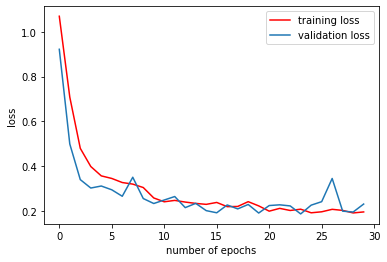

In [17]:
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('number of epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

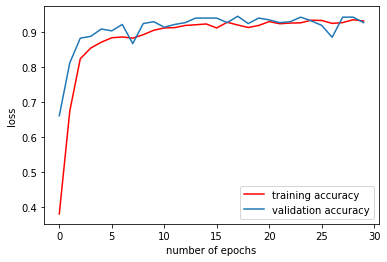

In [18]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('number of epochs')
plt.ylabel('loss')
plt.legend()
plt.show()